In [23]:
import joblib
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import librosa

In [24]:

# Load the data
features_3_sec = pd.read_csv("D:/Materii/M1/SEM2/TCSV/PROIECT/Musical-genre-classifier/data/Data/features_3_sec.csv")
features_30_sec = pd.read_csv("D:/Materii/M1/SEM2/TCSV/PROIECT/Musical-genre-classifier/data/Data/features_30_sec.csv")

# Select the features and labels
X_3_sec = features_3_sec.drop(columns=['filename', 'length', 'label'])
y_3_sec = features_3_sec['label']

X_30_sec = features_30_sec.drop(columns=['filename', 'length', 'label'])
y_30_sec = features_30_sec['label']

# Encode the labels
label_encoder = LabelEncoder()
y_3_sec_encoded = label_encoder.fit_transform(y_3_sec)
y_30_sec_encoded = label_encoder.transform(y_30_sec)

joblib.dump(label_encoder, 'y_3_sec_encoded.pkl')
# Split the dataset into training and test sets
X_train_3_sec, X_test_3_sec, y_train_3_sec, y_test_3_sec, train_idx, test_idx = train_test_split(
    X_3_sec, y_3_sec_encoded, range(len(y_3_sec_encoded)), test_size=0.2, random_state=42
)
X_train_30_sec, X_test_30_sec, y_train_30_sec, y_test_30_sec = train_test_split(X_30_sec, y_30_sec_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler_3_sec = StandardScaler()

scaler_3_sec.fit(X_train_3_sec)
# Save the scaler
joblib.dump(scaler_3_sec, 'scaler_3_sec.pkl')

X_train_3_sec_scaled = scaler_3_sec.fit_transform(X_train_3_sec)
X_test_3_sec_scaled = scaler_3_sec.transform(X_test_3_sec)

scaler_30_sec = StandardScaler()
X_train_30_sec_scaled = scaler_30_sec.fit_transform(X_train_30_sec)
X_test_30_sec_scaled = scaler_30_sec.transform(X_test_30_sec)




In [11]:
# SVM Classifier for 3-second features
svm_3_sec = SVC(kernel='linear', probability=True)
svm_3_sec.fit(X_train_3_sec_scaled, y_train_3_sec)
y_pred_svm_3_sec = svm_3_sec.predict(X_test_3_sec_scaled)
print("SVM Accuracy (3 sec):", accuracy_score(y_test_3_sec, y_pred_svm_3_sec))
print(classification_report(y_test_3_sec, y_pred_svm_3_sec, target_names=label_encoder.classes_))


SVM Accuracy (3 sec): 0.7717717717717718
              precision    recall  f1-score   support

       blues       0.72      0.79      0.76       208
   classical       0.90      0.95      0.93       203
     country       0.65      0.72      0.68       186
       disco       0.68      0.70      0.69       199
      hiphop       0.78      0.76      0.77       218
        jazz       0.85      0.85      0.85       192
       metal       0.86      0.87      0.86       204
         pop       0.83      0.88      0.85       180
      reggae       0.78      0.64      0.70       211
        rock       0.65      0.55      0.60       197

    accuracy                           0.77      1998
   macro avg       0.77      0.77      0.77      1998
weighted avg       0.77      0.77      0.77      1998



In [12]:
# Random Forest Classifier for 3-second features
rf_3_sec = RandomForestClassifier(n_estimators=100)
rf_3_sec.fit(X_train_3_sec_scaled, y_train_3_sec)
y_pred_rf_3_sec = rf_3_sec.predict(X_test_3_sec_scaled)
print("Random Forest Accuracy (3 sec):", accuracy_score(y_test_3_sec, y_pred_rf_3_sec))
print(classification_report(y_test_3_sec, y_pred_rf_3_sec, target_names=label_encoder.classes_))


Random Forest Accuracy (3 sec): 0.8733733733733734
              precision    recall  f1-score   support

       blues       0.88      0.87      0.87       208
   classical       0.92      0.98      0.95       203
     country       0.78      0.80      0.79       186
       disco       0.84      0.83      0.84       199
      hiphop       0.92      0.89      0.90       218
        jazz       0.83      0.90      0.86       192
       metal       0.89      0.95      0.92       204
         pop       0.90      0.93      0.92       180
      reggae       0.87      0.84      0.86       211
        rock       0.88      0.75      0.81       197

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998



In [13]:
# SVM Classifier for 30-second features
svm_30_sec = SVC(kernel='linear', probability=True)
svm_30_sec.fit(X_train_30_sec_scaled, y_train_30_sec)
y_pred_svm_30_sec = svm_30_sec.predict(X_test_30_sec_scaled)
print("SVM Accuracy (30 sec):", accuracy_score(y_test_30_sec, y_pred_svm_30_sec))
print(classification_report(y_test_30_sec, y_pred_svm_30_sec, target_names=label_encoder.classes_))


SVM Accuracy (30 sec): 0.695
              precision    recall  f1-score   support

       blues       0.52      0.80      0.63        20
   classical       1.00      0.92      0.96        13
     country       0.72      0.67      0.69        27
       disco       0.70      0.67      0.68        21
      hiphop       0.60      0.80      0.69        15
        jazz       0.88      0.68      0.77        22
       metal       0.91      0.84      0.88        25
         pop       0.79      0.85      0.81        13
      reggae       0.56      0.43      0.49        23
        rock       0.50      0.48      0.49        21

    accuracy                           0.69       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.71      0.69      0.70       200



In [14]:
# Random Forest Classifier for 30-second features
rf_30_sec = RandomForestClassifier(n_estimators=100)
rf_30_sec.fit(X_train_30_sec_scaled, y_train_30_sec)
y_pred_rf_30_sec = rf_30_sec.predict(X_test_30_sec_scaled)
print("Random Forest Accuracy (30 sec):", accuracy_score(y_test_30_sec, y_pred_rf_30_sec))
print(classification_report(y_test_30_sec, y_pred_rf_30_sec, target_names=label_encoder.classes_))

Random Forest Accuracy (30 sec): 0.69
              precision    recall  f1-score   support

       blues       0.60      0.75      0.67        20
   classical       1.00      1.00      1.00        13
     country       0.75      0.56      0.64        27
       disco       0.54      0.62      0.58        21
      hiphop       0.59      0.67      0.62        15
        jazz       0.91      0.91      0.91        22
       metal       0.70      0.92      0.79        25
         pop       0.77      0.77      0.77        13
      reggae       0.53      0.43      0.48        23
        rock       0.64      0.43      0.51        21

    accuracy                           0.69       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.69      0.69      0.68       200



In [15]:
# Save the trained Random Forest model
joblib.dump(rf_3_sec, 'random_forest_3_sec.pkl')

# Load the trained model
rf_3_sec_loaded = joblib.load('random_forest_3_sec.pkl')


C:\Users\jimon\AppData\Local\Temp\ipykernel_4084\1662883174.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(classes), rotation=45)
C:\Users\jimon\AppData\Local\Temp\ipykernel_4084\1662883174.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(classes))


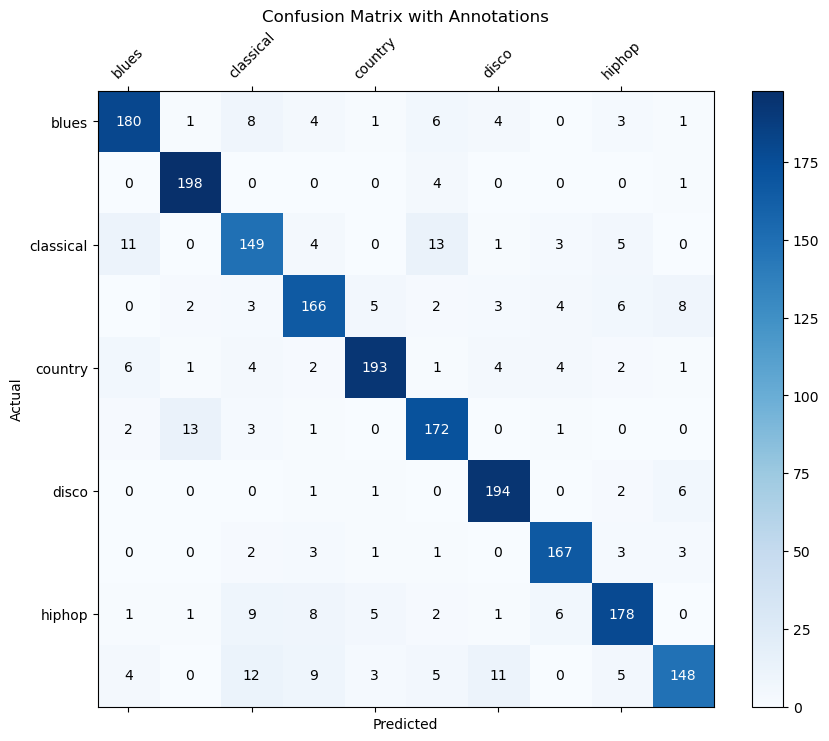

In [28]:
# Generate predictions for the test set
y_pred_rf_3_sec = rf_3_sec_loaded.predict(X_test_3_sec_scaled)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_3_sec, y_pred_rf_3_sec)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(conf_matrix, cmap='Blues')
fig.colorbar(cax)

# Setting up the labels for x and y axis
classes = label_encoder.classes_
ax.set_xticklabels([''] + list(classes), rotation=45)
ax.set_yticklabels([''] + list(classes))

# Adding annotations to each cell
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='white' if val > conf_matrix.max()/2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Annotations')
plt.show()



In [29]:
# Analyze mispredictions
mispredicted_indices = np.where(y_test_3_sec != y_pred_rf_3_sec)[0]
mispredictions = [(features_3_sec.iloc[test_idx[index]]['filename'], label_encoder.inverse_transform([y_test_3_sec[index]])[0], label_encoder.inverse_transform([y_pred_rf_3_sec[index]])[0]) for index in mispredicted_indices]

# Display some examples of mispredictions
print("Examples of Mispredictions:")
for filename, actual, predicted in mispredictions[:5]:  # Display first 5 mispredictions
    print(f"File: {filename}, Actual: {actual}, Predicted: {predicted}")

Examples of Mispredictions:
File: hiphop.00002.8.wav, Actual: hiphop, Predicted: reggae
File: country.00038.2.wav, Actual: country, Predicted: disco
File: reggae.00061.2.wav, Actual: reggae, Predicted: hiphop
File: reggae.00087.7.wav, Actual: reggae, Predicted: pop
File: reggae.00079.3.wav, Actual: reggae, Predicted: disco


In [30]:
# Analyze best and worst performing classes
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
best_class_index = np.argmax(class_accuracies)
worst_class_index = np.argmin(class_accuracies)

print(f"Best Performing Class: {label_encoder.classes_[best_class_index]}, Accuracy: {class_accuracies[best_class_index]}")
print(f"Worst Performing Class: {label_encoder.classes_[worst_class_index]}, Accuracy: {class_accuracies[worst_class_index]}")

Best Performing Class: classical, Accuracy: 0.9753694581280788
Worst Performing Class: rock, Accuracy: 0.751269035532995


In [31]:
# Create datasets and dataloaders
class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return torch.tensor(self.features[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

class SimpleCNN(nn.Module):
    def __init__(self, input_dim, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * (input_dim // 4), 128)  # Adjust according to the input dimension
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)


In [32]:

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create datasets and dataloaders
train_dataset = FeatureDataset(X_train_3_sec_scaled, y_train_3_sec)
test_dataset = FeatureDataset(X_test_3_sec_scaled, y_test_3_sec)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [33]:
# Initialize the model, criterion, and optimizer
input_dim = X_train_3_sec_scaled.shape[1]
cnn_model = SimpleCNN(input_dim=input_dim, num_classes=len(label_encoder.classes_)).to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.unsqueeze(1)  # Add channel dimension
        optimizer.zero_grad()
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')

# Save the trained CNN model
torch.save(cnn_model.state_dict(), 'cnn_model.pth')

# Load the trained CNN model
cnn_model.load_state_dict(torch.load('cnn_model.pth'))


Epoch 1, Loss: 1.3434685096740722
Epoch 2, Loss: 0.897893032193184
Epoch 3, Loss: 0.7192147169709205
Epoch 4, Loss: 0.6015838661789894
Epoch 5, Loss: 0.4962885263562202
Epoch 6, Loss: 0.4000252048075199
Epoch 7, Loss: 0.3284826202690601
Epoch 8, Loss: 0.2729133186042309
Epoch 9, Loss: 0.21994354573637248
Epoch 10, Loss: 0.17699536767601967
Epoch 11, Loss: 0.15259281589835882
Epoch 12, Loss: 0.10845751616358756
Epoch 13, Loss: 0.07803571158275008
Epoch 14, Loss: 0.08009265555813909
Epoch 15, Loss: 0.05411295662820339
Epoch 16, Loss: 0.041096517166122795
Epoch 17, Loss: 0.042841123048914596
Epoch 18, Loss: 0.06874808993469923
Epoch 19, Loss: 0.03161433334648609
Epoch 20, Loss: 0.023871350257657468


<All keys matched successfully>

CNN Accuracy: 87 %


C:\Users\jimon\AppData\Local\Temp\ipykernel_4084\2933252188.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(classes), rotation=45)
C:\Users\jimon\AppData\Local\Temp\ipykernel_4084\2933252188.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(classes))


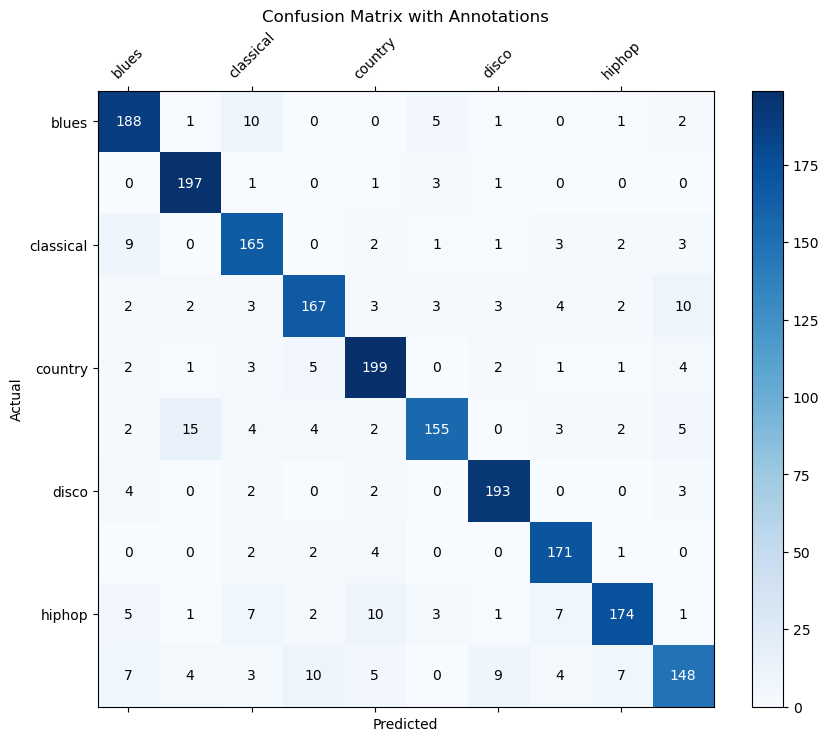

Examples of Mispredictions:
File: metal.00080.3.wav, Actual: metal, Predicted: rock
File: reggae.00087.7.wav, Actual: reggae, Predicted: pop
File: blues.00010.7.wav, Actual: blues, Predicted: country
File: pop.00033.3.wav, Actual: pop, Predicted: country
File: hiphop.00095.8.wav, Actual: hiphop, Predicted: metal
Best Performing Class: classical, Accuracy: 0.9704433497536946
Worst Performing Class: rock, Accuracy: 0.751269035532995


In [35]:
# Load the trained CNN model
cnn_model.load_state_dict(torch.load('cnn_model.pth'))

# Evaluate the CNN model
cnn_model.eval()
correct = 0
total = 0
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.unsqueeze(1)  # Add channel dimension
        outputs = cnn_model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

print('CNN Accuracy: %d %%' % (100 * correct / total))

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(conf_matrix, cmap='Blues')
fig.colorbar(cax)

# Setting up the labels for x and y axis
classes = label_encoder.classes_
ax.set_xticklabels([''] + list(classes), rotation=45)
ax.set_yticklabels([''] + list(classes))

# Adding annotations to each cell
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='white' if val > conf_matrix.max()/2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Annotations')
plt.show()

# Analyze mispredictions
mispredicted_indices = np.where(np.array(all_labels) != np.array(all_predictions))[0]
mispredictions = [(features_3_sec.iloc[test_idx[index]]['filename'], label_encoder.inverse_transform([all_labels[index]])[0], label_encoder.inverse_transform([all_predictions[index]])[0]) for index in mispredicted_indices]



In [ ]:
# Display some examples of mispredictions
print("Examples of Mispredictions:")
for filename, actual, predicted in mispredictions[:5]:  # Display first 5 mispredictions
    print(f"File: {filename}, Actual: {actual}, Predicted: {predicted}")




In [ ]:
# Analyze best and worst performing classes
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
best_class_index = np.argmax(class_accuracies)
worst_class_index = np.argmin(class_accuracies)

print(f"Best Performing Class: {label_encoder.classes_[best_class_index]}, Accuracy: {class_accuracies[best_class_index]}")
print(f"Worst Performing Class: {label_encoder.classes_[worst_class_index]}, Accuracy: {class_accuracies[worst_class_index]}")